In [15]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

## 11.1

Fit of function:
$$
f(x)=2x+1
$$
In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

#### varying Nepochs

In [2]:
#target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [15]:
TL = np.zeros(10)
TA = np.zeros(10)
for i in range(10):
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, 500)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function
    
    sigma = 0.0 # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(1))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
                  
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs= 20+5*int(i),
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    TL[i]=score[0]
    print (TL[i])
    TA[i]=score[1]
print (TL)
print (TA)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1730 - mse: 1.1730 - val_loss: 0.7126 - val_mse: 0.7126
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7624 - mse: 0.7624 - val_loss: 0.4403 - val_mse: 0.4403
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4700 - mse: 0.4700 - val_loss: 0.2850 - val_mse: 0.2850
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3121 - mse: 0.3121 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2036 - mse: 0.2036 - val_loss: 0.1371 - val_mse: 0.1371
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1336 - mse: 0.1336 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1099 - mse: 0.1099 - val_loss: 0.0764 - val_mse: 0.0764
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0789 - mse: 0.0789 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0625 - mse: 

Text(0, 0.5, 'Test loss')

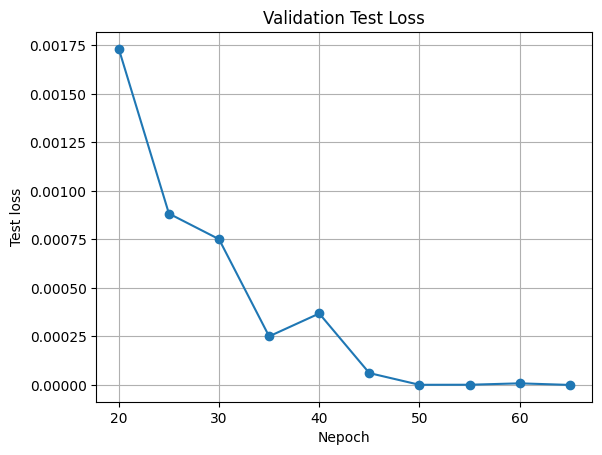

In [13]:
#Test loss
Nepochs = np.arange(0,10)
plt.plot(20+5*Nepochs, TL, marker = 'o')
plt.grid()
plt.title ('Validation Test Loss')
plt.xlabel('Nepoch')
plt.ylabel('Test loss')

Text(0, 0.5, 'Test accuracy')

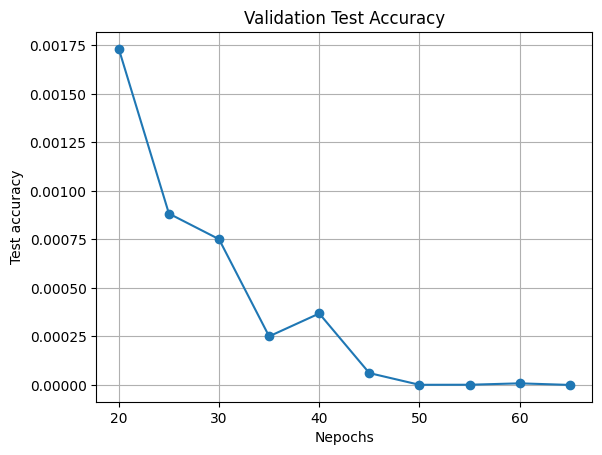

In [14]:
#Test accuracy
Nepochs = np.arange(0,10)
plt.plot(20+5*Nepochs, TA, marker = 'o')
plt.grid()
plt.title ('Validation Test Accuracy')
plt.xlabel('Nepochs')
plt.ylabel('Test accuracy')

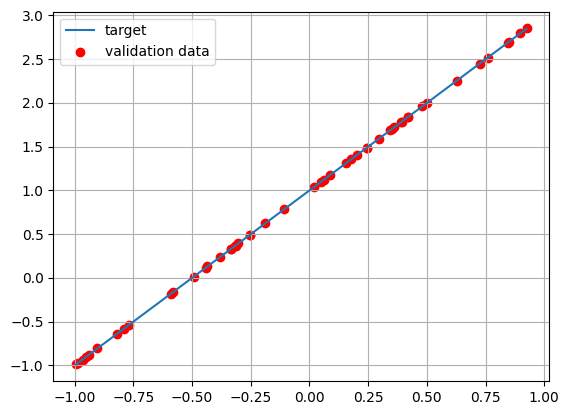

In [6]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

#### varying Ntrain

In [16]:
TL1 = np.zeros(10)
TA1 = np.zeros(10)
for i in range(10):
    Ntrain = 300 + i*100
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, Ntrain)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function
    
    sigma = 0.0 # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(1))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
                  
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs= 35,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    TL1[i]=score[0]
    TA1[i]=score[1]
print (TL1)
print (TA1)

Epoch 1/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7607 - mse: 2.7607 - val_loss: 1.6410 - val_mse: 1.6410
Epoch 2/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2876 - mse: 2.2876 - val_loss: 1.3628 - val_mse: 1.3628
Epoch 3/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8052 - mse: 1.8052 - val_loss: 1.1465 - val_mse: 1.1465
Epoch 4/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4599 - mse: 1.4599 - val_loss: 0.9774 - val_mse: 0.9774
Epoch 5/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2121 - mse: 1.2121 - val_loss: 0.8430 - val_mse: 0.8430
Epoch 6/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9794 - mse: 0.9794 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 7/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9397 - mse: 0.9397 - val_loss: 0.6364 - val_mse: 0.6364
Epoch 8/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7770 - mse: 0.7770 - val_loss: 0.5564 - val_mse: 0.5564
Epoch 9/35
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6241 - mse:

Text(0, 0.5, 'Test loss')

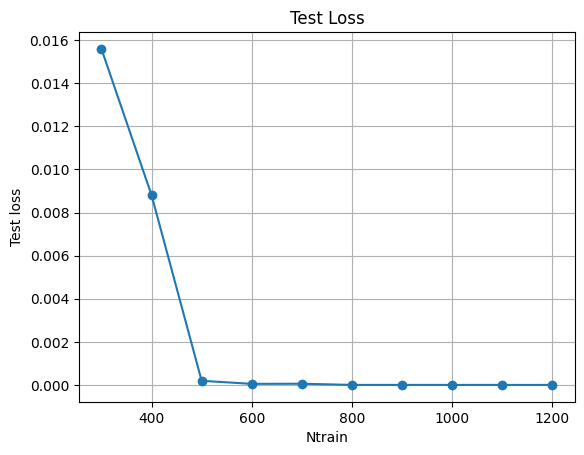

In [17]:
#Test loss
Ntrain = np.arange(0,10)
plt.plot(300+100*Ntrain, TL1, marker = 'o')
plt.grid()
plt.title ('Test Loss')
plt.xlabel('Ntrain')
plt.ylabel('Test loss')

In [ ]:
#test accuracy
Ntrain = np.arange(0,5)
plt.plot(300+100*Ntrain, TA1, marker = 'o')
plt.grid()
plt.title ('Validation Test Accuracy')
plt.xlabel('Ntrain')
plt.ylabel('Test accuracy')

#### noise dependency

In [ ]:
TL2 = np.zeros(5)
TA2 = np.zeros(5)
for i in range(5):
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, 600)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function
    
    sigma = 0.01*i # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(1))
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
                  
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs= 35,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    TL2[i]=score[0]
    TA2[i]=score[1]
print (TL2)
print (TA2)

In [ ]:
#Test loss
sigma = np.arange(0,5)
plt.plot(0.01*sigma, TL2, marker = 'o')
plt.grid()
plt.title ('Validation Test Loss')
plt.xlabel('sigma')
plt.ylabel('Test loss')

In [ ]:
#Test loss
sigma = np.arange(0,5)
plt.plot(0.01*sigma, TA2, marker = 'o')
plt.grid()
plt.title ('Validation Test Accuracy')
plt.xlabel('sigma')
plt.ylabel('Test accuracy')

## 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [2]:
#target parameters
a = 3
b=-2
c=-3
d=4

In [38]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

y_target = a*(x_valid**3)+b*(x_valid**2)+c*x_valid+d

sigma = 0.001 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a*(x_train**3)+b*(x_train**2)+c*x_train+d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*(x_valid**3)+b*(x_valid**2)+c*x_valid+d, sigma)

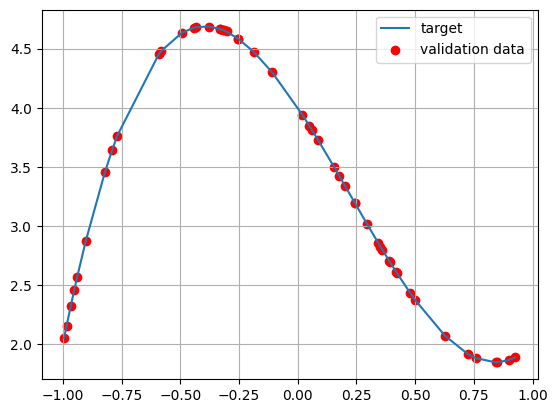

In [39]:
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(1))
#model.add(Dense(3))
#model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=71,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4984 - mse: 0.4984 - val_loss: 0.8444 - val_mse: 0.8444
Epoch 2/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5326 - mse: 0.5326 - val_loss: 0.8444 - val_mse: 0.8444
Epoch 3/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6214 - mse: 0.6214 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 4/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8444 - val_mse: 0.8444
Epoch 5/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5579 - mse: 0.5579 - val_loss: 0.8449 - val_mse: 0.8449
Epoch 6/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5019 - mse: 0.5019 - val_loss: 0.8449 - val_mse: 0.8449
Epoch 7/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5387 - mse: 0.5387 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 8/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5516 - mse: 0.5516 - val_loss: 0.8451 - val_mse: 0.8451
Epoch 9/71
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5083 - mse

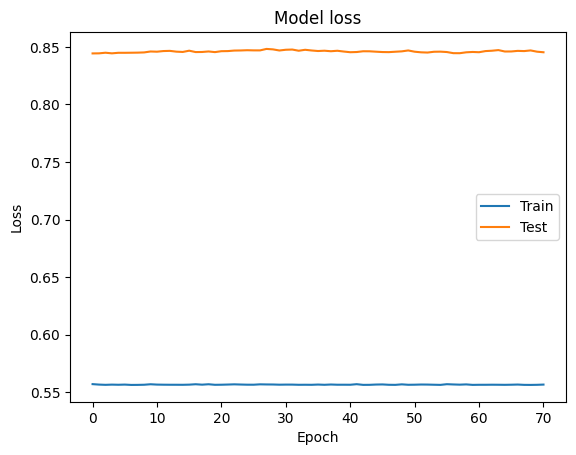

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()